In [130]:
%matplotlib inline
import os
import pandas as pd
import numpy as np

import re
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import itertools
from matplotlib import rc

df=pd.read_excel('Seltzerbowl Data.xlsx').iloc[0:72,:-2]

df.head()

df_flavors = df['Flavor'].str.split(pat=' ', n=-1, expand=True)
df_flavors.columns = ['F'+str(i) for i in range(df_flavors.shape[1])]

df=pd.concat([df.loc[:,'Brand':'Flavor'],df_flavors,df.loc[:,'AJ':'Flavor'],df.loc[:,'AJ':]],axis=1)

df[df['Brand'].str.contains('Arctic')]

df_brand = df.groupby('Brand')

In [69]:
df1=df.drop(['Flavor','F0','F1','F2','F3'],axis=1)

# collapse all efficiency data down to single column
df1=pd.melt(df1 , id_vars = ['Brand'])

In [70]:
order_ls = df1.groupby('Brand').mean().sort_values('value',ascending=False).index.tolist()

In [71]:
Brand_types_count_ls=[]
for i in order_ls:
    Brand_types_count_ls.append(Brand_types_s[i])
    

Brand_types_s=Brand_types_s[order_ls]
new_labels = []
for index, value in Brand_types_s.items():
    new_labels.append(index+': N=' + str(value))

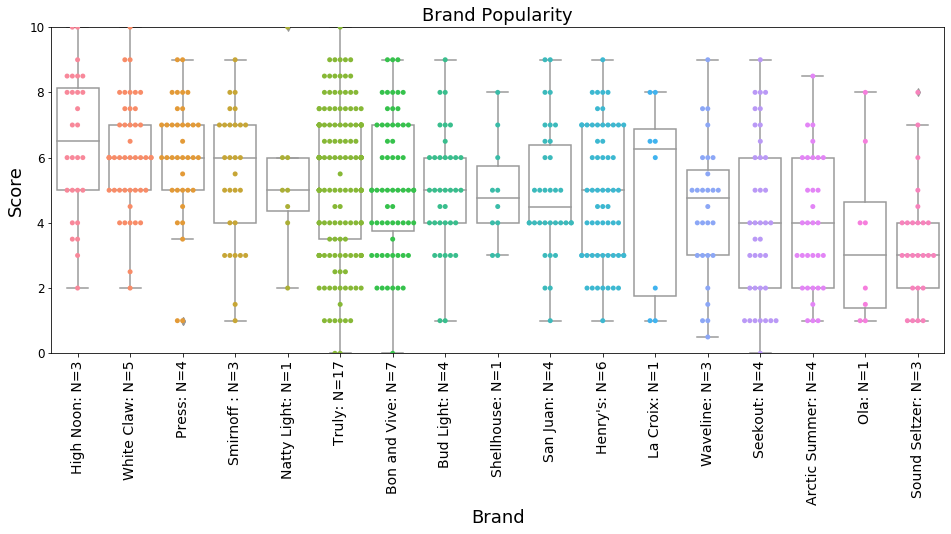

In [72]:
f=plt.figure(figsize=(16, 6))
ax=sns.boxplot(x="Brand", y="value", data=df1,order=order_ls, color='white')
ax = sns.swarmplot(x="Brand", y="value", data=df1,order=order_ls)
ax.set_ylim(0,10)
ax.set_title('Brand Popularity',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.xlabel('Brand', fontsize=18)
plt.ylabel('Score', fontsize=18)

plt.xticks(rotation=90)

ax.set_xticklabels(new_labels, fontsize=14)

f.savefig('Brand_popularity.png',bbox_inches='tight',dpi=300)

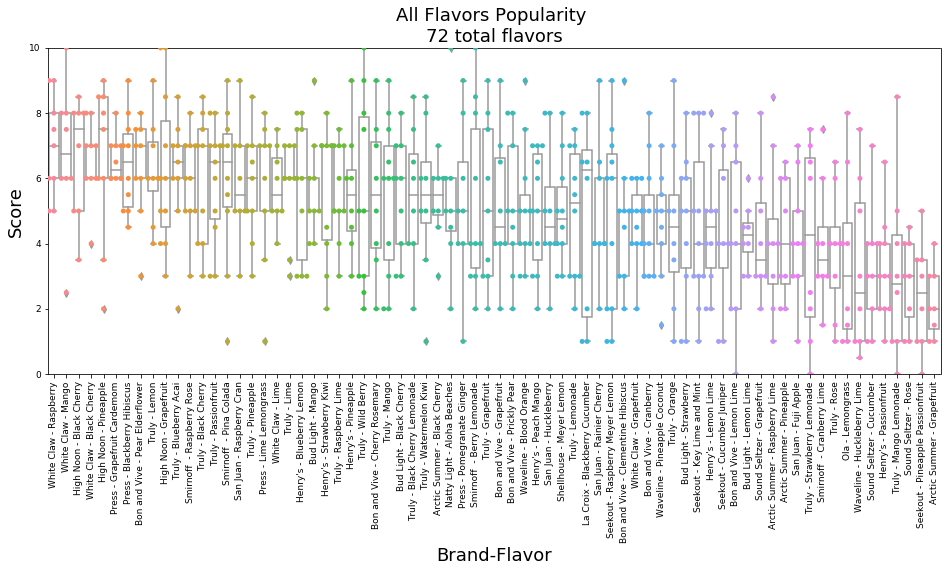

In [134]:
# All brand-flavor combos ranked

# 
df['Brand-Flavor'] = df['Brand'] + ' - ' + df['Flavor']

df_bf=pd.concat([df['Brand-Flavor'],df.loc[:,'AJ':'AC']],axis=1)

df_bf1=pd.melt(df_bf,id_vars = ['Brand-Flavor'])

order_ls=df_bf1.groupby('Brand-Flavor').mean().sort_values('value',ascending=False).index.tolist()

count_all_flavors = df.shape[0]

f=plt.figure(figsize=(16, 6))
ax=sns.boxplot(x="Brand-Flavor", y="value", data=df_bf1, color='white',order=order_ls)
ax = sns.swarmplot(x="Brand-Flavor", y="value", data=df_bf1,order=order_ls)
ax.set_ylim(0,10)
ax.set_title('All Flavors Popularity \n'+str(count_all_flavors)+' total flavors',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=9)

plt.xlabel('Brand-Flavor', fontsize=18)
plt.ylabel('Score', fontsize=18)

plt.xticks(rotation=90)

# ax.set_xticklabels(new_labels, fontsize=14)

f.savefig('All_Flavors_popularity.png',bbox_inches='tight',dpi=300)

In [139]:
# Normalized scores
# df.loc['Mean Ind Score']
df.loc[:,'AJ':'AC'].mean(axis=0)

AJ    5.423611
CC    5.569444
CH    4.097222
ES    4.930556
DC    5.687500
JT    5.166667
M     3.513889
SM    5.277778
HH    6.119048
CR    6.173913
AC    4.583333
dtype: float64

In [147]:
df.loc['Mean Ind Score',:]=df.loc[:,'AJ':'AC'].mean(axis=0)

df.loc['Max Ind Score',:]=df.loc[:,'AJ':'AC'].max(axis=0)
df.loc['Min Ind Score',:]=df.loc[:,'AJ':'AC'].min(axis=0)


In [146]:
df.shape

(73, 18)

In [149]:
i=df.loc[:,'AJ']

In [150]:
i_min = df.loc['Min Ind Score','AJ']
# i_max = df.loc[]

In [152]:
i_max = df.loc['Max Ind Score','AJ']

In [148]:
df.loc[:,'AJ':'AC']

,AJ,CC,CH,ES,DC,JT,M,SM,HH,CR,AC
0,6.500000,6.000000,4.000000,2.000000,7.5000,5.000000,4.000000,8.500000,NaN,NaN,NaN
1,1.000000,5.000000,2.000000,3.000000,3.5000,0.000000,1.000000,3.500000,NaN,NaN,NaN
2,4.000000,8.000000,6.000000,5.000000,5.0000,9.000000,4.000000,1.000000,NaN,NaN,NaN
3,2.000000,4.000000,3.000000,3.000000,2.0000,1.000000,1.000000,1.500000,NaN,NaN,NaN
4,3.000000,7.000000,4.000000,2.000000,8.5000,1.000000,4.000000,4.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
70,6.000000,3.000000,2.000000,5.500000,5.0000,3.000000,3.000000,7.000000,7.500000,7.000000,NaN
71,4.000000,2.000000,3.000000,8.000000,4.0000,4.000000,3.000000,6.000000,8.500000,10.000000,NaN
Mean Ind Score,5.423611,5.569444,4.097222,4.930556,5.6875,5.166667,3.513889,5.277778,6.119048,6.173913,4.583333
Max Ind Score,8.500000,9.000000,7.000000,9.000000,10.0000,10.000000,10.000000,8.500000,9.000000,10.000000,7.000000


In [ ]:
# Calculate normalized score

# x*(a-b)

In [21]:
f[0].split(' ')

['Black', 'Cherry', 'Lemonade']

In [27]:
# All flavors flat list

flavor_ls=[]
for i in f:  
    k=i.split(' ')
    flavor_ls.append(k)
    
flat_flavor_ls = [item for sublist in flavor_ls for item in sublist]
    

In [58]:
set(flat_flavor_ls)

{'Acai',
 'Aloha',
 'Apple',
 'Beaches',
 'Berry',
 'Black',
 'Blackberry',
 'Blood',
 'Blueberry',
 'Cardemom',
 'Cherry',
 'Clementine',
 'Coconut',
 'Colada',
 'Cran',
 'Cranberry',
 'Cucumber',
 'Elderflower',
 'Fuji',
 'Ginger',
 'Grapefruit',
 'Hibiscus',
 'Huckleberry',
 'Juniper',
 'Key',
 'Kiwi',
 'Lemon',
 'Lemonade',
 'Lemongrass',
 'Lime',
 'Mango',
 'Meyer',
 'Mint',
 'Orange',
 'Passionfruit',
 'Peach',
 'Pear',
 'Pina',
 'Pineapple',
 'Pomegranate',
 'Prickly',
 'Rainier',
 'Raspberry',
 'Rose',
 'Rosemary',
 'Strawberry',
 'Watermelon',
 'Wild',
 'and'}